In [150]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
from statsmodels.tsa.arima_model import ARMA
import matplotlib.pyplot as plt
import math
from sklearn.metrics import mean_squared_error as mse
import sklearn.gaussian_process as gp

In [151]:
j = pd.read_csv('JULY_B_2018.csv')
a = pd.read_csv('AUG_B_2018.csv')
s = pd.read_csv('SEP_B_2018.csv')
o = pd.read_csv('OCT_B_2018.csv')
n = pd.read_csv('NOV_B_2018.csv')
d = pd.read_csv('DEC_B_2018.csv')
jan = pd.read_csv('JAN_B_2019.csv')
fab = pd.read_csv('FAB_B_2019.csv')
m = pd.read_csv('MAR_B_2018.csv')
ma = pd.read_csv('APR_B_2018.csv')
my = pd.read_csv('MAY_B_2018.csv')
ju = pd.read_csv('JUNE_B_2018.csv')
mar2019 = pd.read_csv('MAR_B_2019.csv')

In [152]:
ff3 = m.T.iloc[21:55]
ff4 = ma.T.iloc[21:55] # july data
ff5 = my.T.iloc[21:55] # august data
ff6 = ju.T.iloc[21:55] # september data
ff7 = j.T.iloc[21:55] # October data
ff8 = a.T.iloc[21:55] # november data
ff9 = s.T.iloc[21:55] # december data
ff10 = o.T.iloc[21:55] # january data
ff11 = n.T.iloc[21:55] # february data
ff12 = d.T.iloc[21:55]    # march data
ff1 = jan.T.iloc[21:55] # january data
ff2 = fab.T.iloc[21:55] #february
ffx = mar2019

In [153]:
ff3 = ff3.T

In [154]:
data = []
for d in ff3.values:
    for dx in d:
        data.append(dx)

In [155]:
d1 = data[1:]
d2 = data[0:len(data)-1]

In [156]:
# breaking the data into train and test
X_train = data[:600]
X_test = data[600:]

In [157]:
# Support for maths
!pip install GPy
import numpy as np
# Plotting tools
from matplotlib import pyplot as plt
# we use the following for plotting figures in jupyter
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

# GPy: Gaussian processes library
import GPy

You should consider upgrading via the 'c:\users\karan\appdata\local\programs\python\python36\python.exe -m pip install --upgrade pip' command.


In [158]:
X = X_train[:len(X_train)-3]
y = X_train[3:]

In [159]:
y_test = X_test[3:]
X_test = np.array(X_test[:len(X_test)-3]).reshape(-1,1)

In [160]:
len(X),len(y)

(597, 597)

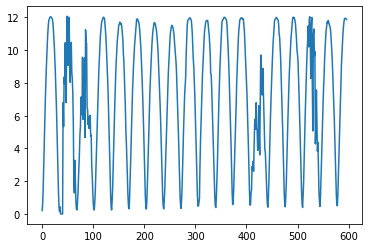

In [113]:
plt.plot(X)

In [184]:
kernel = gp.kernels.ConstantKernel(1.0, (1e-1, 1e3)) * gp.kernels.RBF(10.0, (1e-3, 1e3))
kernel = gp.kernels.RBF(10.0, (1e-3, 1e3))

In [185]:
from sklearn.gaussian_process.kernels import ConstantKernel, RBF
kernel = ConstantKernel(constant_value=1.0, constant_value_bounds=(0.0, 10.0)) #* 
kernel = RBF(length_scale=0.5, length_scale_bounds=(0.0, 10.0)) + RBF(length_scale=2.0, length_scale_bounds=(0.0, 10.0))
#>>> for hyperparameter in kernel.hyperparameters: print(hyperparameter)

In [186]:
X = np.array(X).reshape(-1,1)
Y = y

In [187]:
X = np.array(X)
Y = np.array(Y)

In [188]:
X.shape,Y.shape,np.array(X_test).shape,len(y_test)

((597, 1), (597,), (383, 1), 383)

In [189]:
model = gp.GaussianProcessRegressor(kernel=kernel, alpha=0.1, normalize_y=True)

In [190]:
model.fit(X, y)
params = model.kernel_.get_params()

In [191]:
y_pred, std = model.predict(X_test, return_std=True)

In [192]:
y_pred1 = 1.96*std+y_pred
y_pred2 = y_pred - 1.96*std

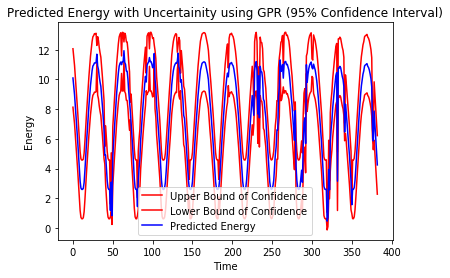

In [193]:
plt.plot(y_pred1,'-r')
plt.plot(y_pred2,'-r')
plt.plot(y_pred,'-b')
#plt.fill_between(y_pred1, y_pred2, color='#539ecd')
plt.legend(["Upper Bound of Confidence","Lower Bound of Confidence","Predicted Energy"])
plt.xlabel("Time")
plt.ylabel("Energy")
plt.title("Predicted Energy with Uncertainity using GPR (95% Confidence Interval)")
plt.show()

In [143]:
v = [i for i in range (0,383) ]

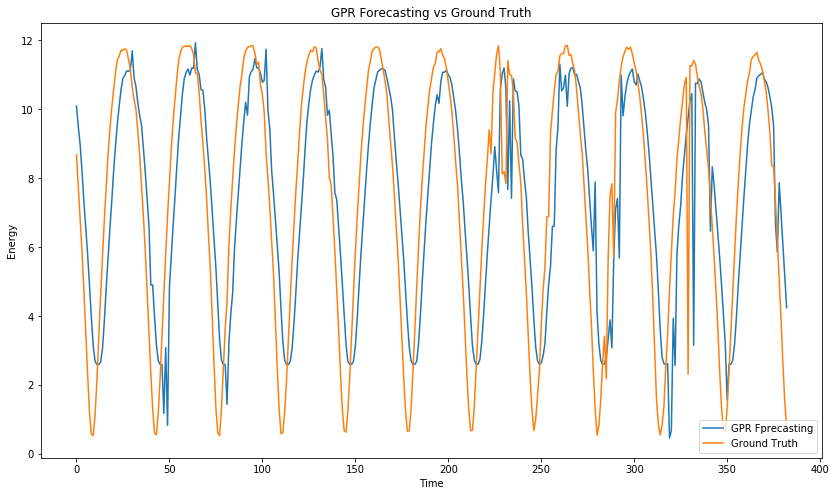

In [213]:
plt.figure(figsize=(14,8))
plt.plot(y_pred)
plt.plot(y_test)
plt.ylabel("Energy")
plt.xlabel("Time")
plt.title("GPR Forecasting vs Ground Truth")
plt.legend(["GPR Fprecasting","Ground Truth"])
plt.show()

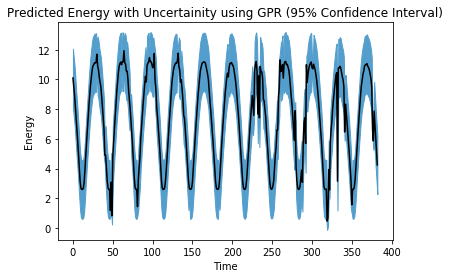

In [144]:
plt.plot(y_pred,'-k')
plt.fill_between(v, y_pred1, y_pred2, color='#539ecd')
plt.xlabel("Time")
plt.ylabel("Energy")
plt.title("Predicted Energy with Uncertainity using GPR (95% Confidence Interval)")
plt.show()

In [145]:
MSE = math.sqrt(((y_pred-y_test)**2).mean())

In [146]:
print("Mean Squared Error of the Model: ",math.sqrt(mse(y_test,y_pred)))

Mean Squared Error of the Model:  2.3036781913855657


### Plot for uncertainity at each point vs Error

In [147]:
error = (y_pred-y_test) #calcuating the error 

[]

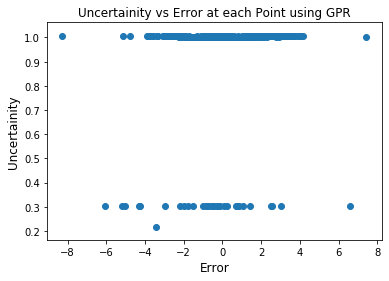

In [148]:
plt.scatter(error,std)
plt.xlabel("Error", size=12)
plt.ylabel("Uncertainity", size = 12)
plt.title("Uncertainity vs Error at each Point using GPR")
plt.plot()

### ARMA Model with Optimal Parameter

In [194]:
model = ARMA(X_train, order=(4, 8))
model_fit = model.fit(disp=False)
yhat = model_fit.predict(len(X_train), len(X_test)+len(X_train)-1)
print("RMSE of the model :",math.sqrt(mse(X_test,yhat)))

RMSE of the model : 1.1991391316991513


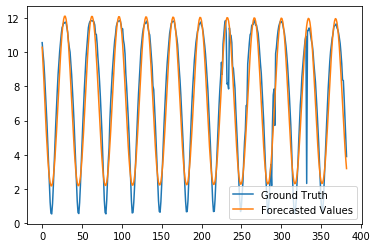

In [195]:
plt.plot(X_test)
plt.plot(yhat)
plt.legend(["Ground Truth","Forecasted Values"])

### SVM model with optimal parameters

In [196]:
from sklearn.svm import SVR

In [197]:
reg = SVR(kernel = 'linear',C=.1)
reg.fit(np.array(X).reshape(-1,1),y)
y_pred1 = reg.predict(X_test)

In [198]:
math.sqrt(mse(y_test,y_pred))

2.3036781913855657

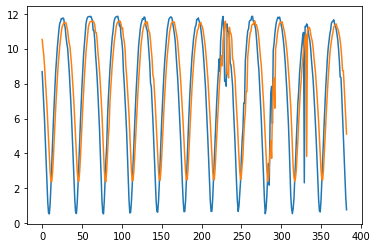

In [199]:
plt.plot(y_test)
plt.plot(y_pred1)

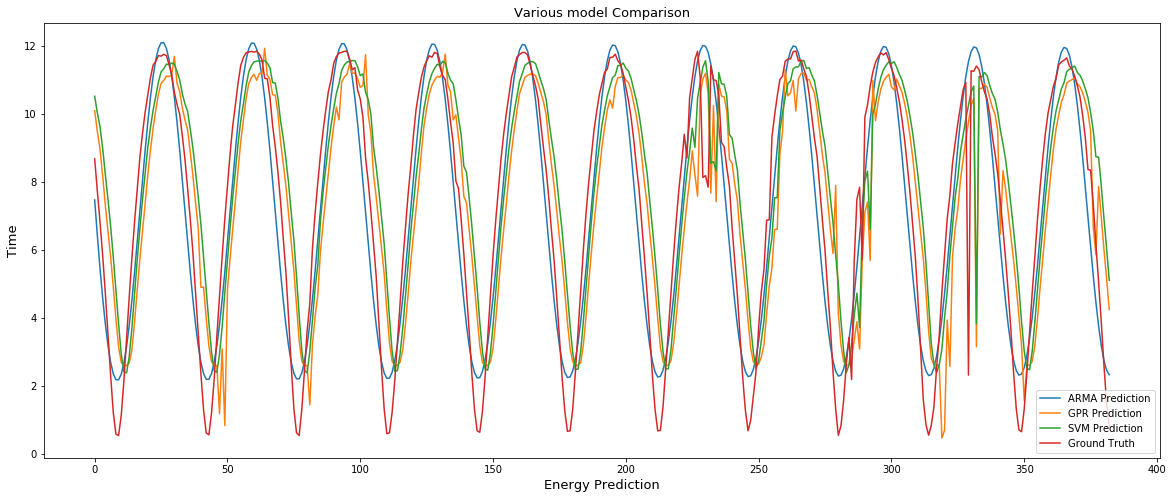

In [223]:
plt.figure(figsize = (20,8))
plt.plot(y12)
plt.plot(y_pred)
plt.plot(y_pred1)
plt.plot(y_test)
plt.title("Various model Comparison",size=13)
plt.xlabel("Energy Prediction",size=13)
plt.ylabel("Time",size = 13)
plt.legend(["ARMA Prediction","GPR Prediction","SVM Prediction","Ground Truth"])
plt.show()